In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

In [33]:
df = pd.read_csv("C:\\Users\\ACER\\Desktop\\predictiveca\\Car_Insurance_Claim.csv")
df.head()

,ID,AGE,GENDER,RACE,DRIVING_EXPERIENCE,EDUCATION,INCOME,CREDIT_SCORE,VEHICLE_OWNERSHIP,VEHICLE_YEAR,MARRIED,CHILDREN,POSTAL_CODE,ANNUAL_MILEAGE,VEHICLE_TYPE,SPEEDING_VIOLATIONS,DUIS,PAST_ACCIDENTS,OUTCOME
0,569520,65+,female,majority,0-9y,high school,upper class,0.629027,1.0,after 2015,0.0,1.0,10238,12000.0,sedan,0,0,0,0.0
1,750365,16-25,male,majority,0-9y,none,poverty,0.357757,0.0,before 2015,0.0,0.0,10238,16000.0,sedan,0,0,0,1.0
2,199901,16-25,female,majority,0-9y,high school,working class,0.493146,1.0,before 2015,0.0,0.0,10238,11000.0,sedan,0,0,0,0.0
3,478866,16-25,male,majority,0-9y,university,working class,0.206013,1.0,before 2015,0.0,1.0,32765,11000.0,sedan,0,0,0,0.0
4,731664,26-39,male,majority,10-19y,none,working class,0.388366,1.0,before 2015,0.0,0.0,32765,12000.0,sedan,2,0,1,1.0


In [9]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 19 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   10000 non-null  int64  
 1   AGE                  10000 non-null  object 
 2   GENDER               10000 non-null  object 
 3   RACE                 10000 non-null  object 
 4   DRIVING_EXPERIENCE   10000 non-null  object 
 5   EDUCATION            10000 non-null  object 
 6   INCOME               10000 non-null  object 
 7   CREDIT_SCORE         9018 non-null   float64
 8   VEHICLE_OWNERSHIP    10000 non-null  float64
 9   VEHICLE_YEAR         10000 non-null  object 
 10  MARRIED              10000 non-null  float64
 11  CHILDREN             10000 non-null  float64
 12  POSTAL_CODE          10000 non-null  int64  
 13  ANNUAL_MILEAGE       9043 non-null   float64
 14  VEHICLE_TYPE         10000 non-null  object 
 15  SPEEDING_VIOLATIONS  10000 non-null  

In [10]:
print(df.shape)

(10000, 19)


In [11]:
print(df.isnull().sum())

ID                       0
AGE                      0
GENDER                   0
RACE                     0
DRIVING_EXPERIENCE       0
EDUCATION                0
INCOME                   0
CREDIT_SCORE           982
VEHICLE_OWNERSHIP        0
VEHICLE_YEAR             0
MARRIED                  0
CHILDREN                 0
POSTAL_CODE              0
ANNUAL_MILEAGE         957
VEHICLE_TYPE             0
SPEEDING_VIOLATIONS      0
DUIS                     0
PAST_ACCIDENTS           0
OUTCOME                  0
dtype: int64


In [34]:
num_cols = df.select_dtypes(include=['int64', 'float64']).columns
for col in num_cols:
    df[col] = df[col].fillna(df[col].median())
cat_cols = df.select_dtypes(include=['object']).columns
for col in cat_cols:
    df[col] = df[col].fillna(df[col].mode()[0])

print("Missing values after handling:")
print(df.isnull().sum())

Missing values after handling:
ID                     0
AGE                    0
GENDER                 0
RACE                   0
DRIVING_EXPERIENCE     0
EDUCATION              0
INCOME                 0
CREDIT_SCORE           0
VEHICLE_OWNERSHIP      0
VEHICLE_YEAR           0
MARRIED                0
CHILDREN               0
POSTAL_CODE            0
ANNUAL_MILEAGE         0
VEHICLE_TYPE           0
SPEEDING_VIOLATIONS    0
DUIS                   0
PAST_ACCIDENTS         0
OUTCOME                0
dtype: int64


In [35]:
le = LabelEncoder()
for col in cat_cols:
    df[col] = le.fit_transform(df[col])

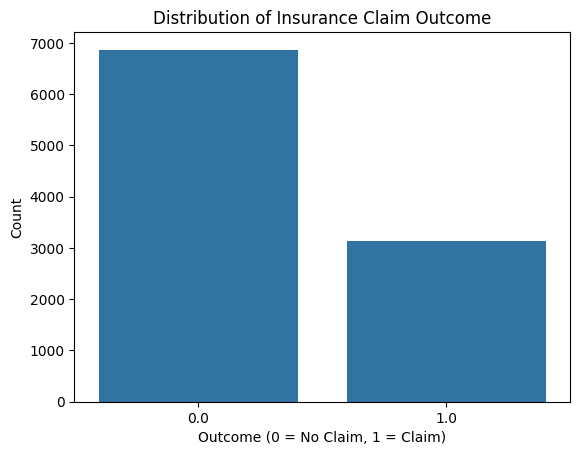

In [36]:
TARGET = 'OUTCOME'
plt.figure()
sns.countplot(x=df[TARGET])
plt.title("Distribution of Insurance Claim Outcome")
plt.xlabel("Outcome (0 = No Claim, 1 = Claim)")
plt.ylabel("Count")
plt.show()

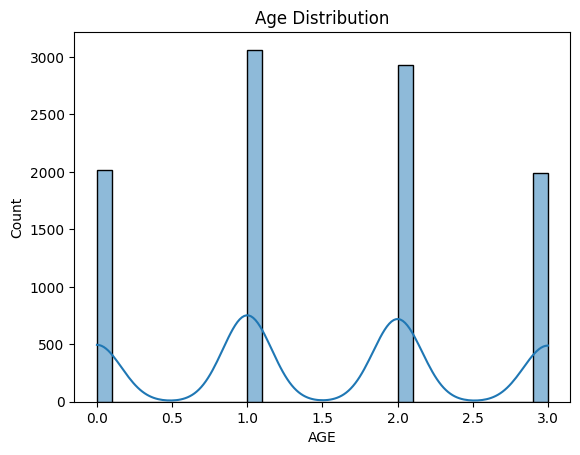

In [15]:
plt.figure()
sns.histplot(df['AGE'], bins=30, kde=True)
plt.title("Age Distribution")
plt.show()

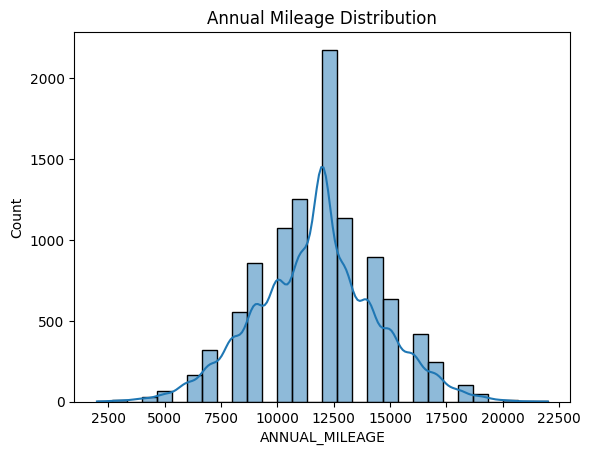

In [16]:
plt.figure()
sns.histplot(df['ANNUAL_MILEAGE'], bins=30, kde=True)
plt.title("Annual Mileage Distribution")
plt.show()

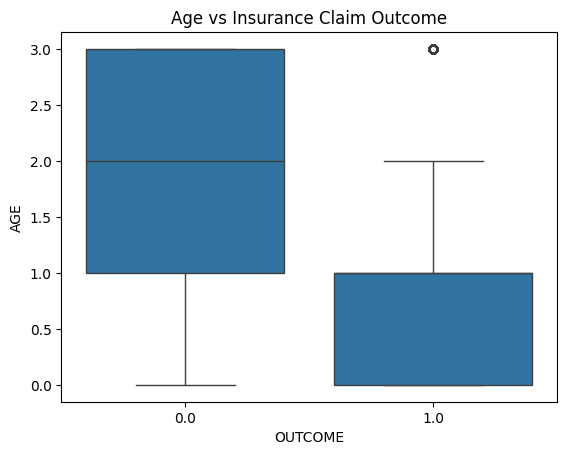

In [17]:
plt.figure()
sns.boxplot(x=TARGET, y='AGE', data=df)
plt.title("Age vs Insurance Claim Outcome")
plt.show()

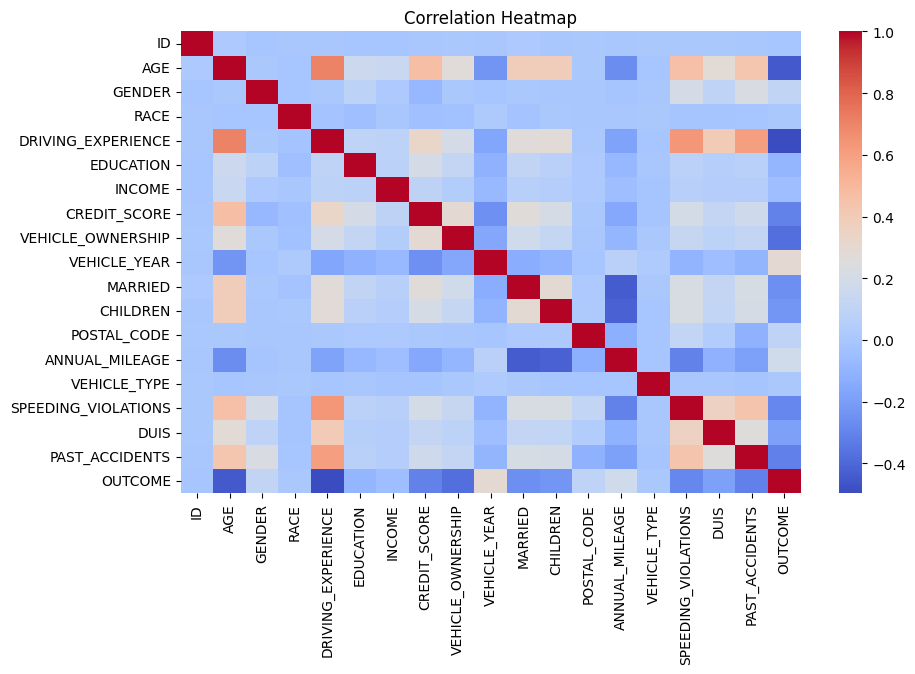

In [32]:
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(), cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()

In [37]:
f = ['AGE', 'ANNUAL_MILEAGE', 'CREDIT_SCORE', 'PAST_ACCIDENTS', 'DRIVING_EXPERIENCE']
X = df[f]
y = df['OUTCOME']

In [38]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [39]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [40]:
lr = LogisticRegression(max_iter=1000)
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)

In [41]:
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

In [42]:
import pickle
with open("random_forest_model.pkl", "wb") as f:
    pickle.dump(rf, f)
with open("scaler.pkl", "wb") as f:
    pickle.dump(scaler, f)
print("Model and scaler saved successfully!")

Model and scaler saved successfully!


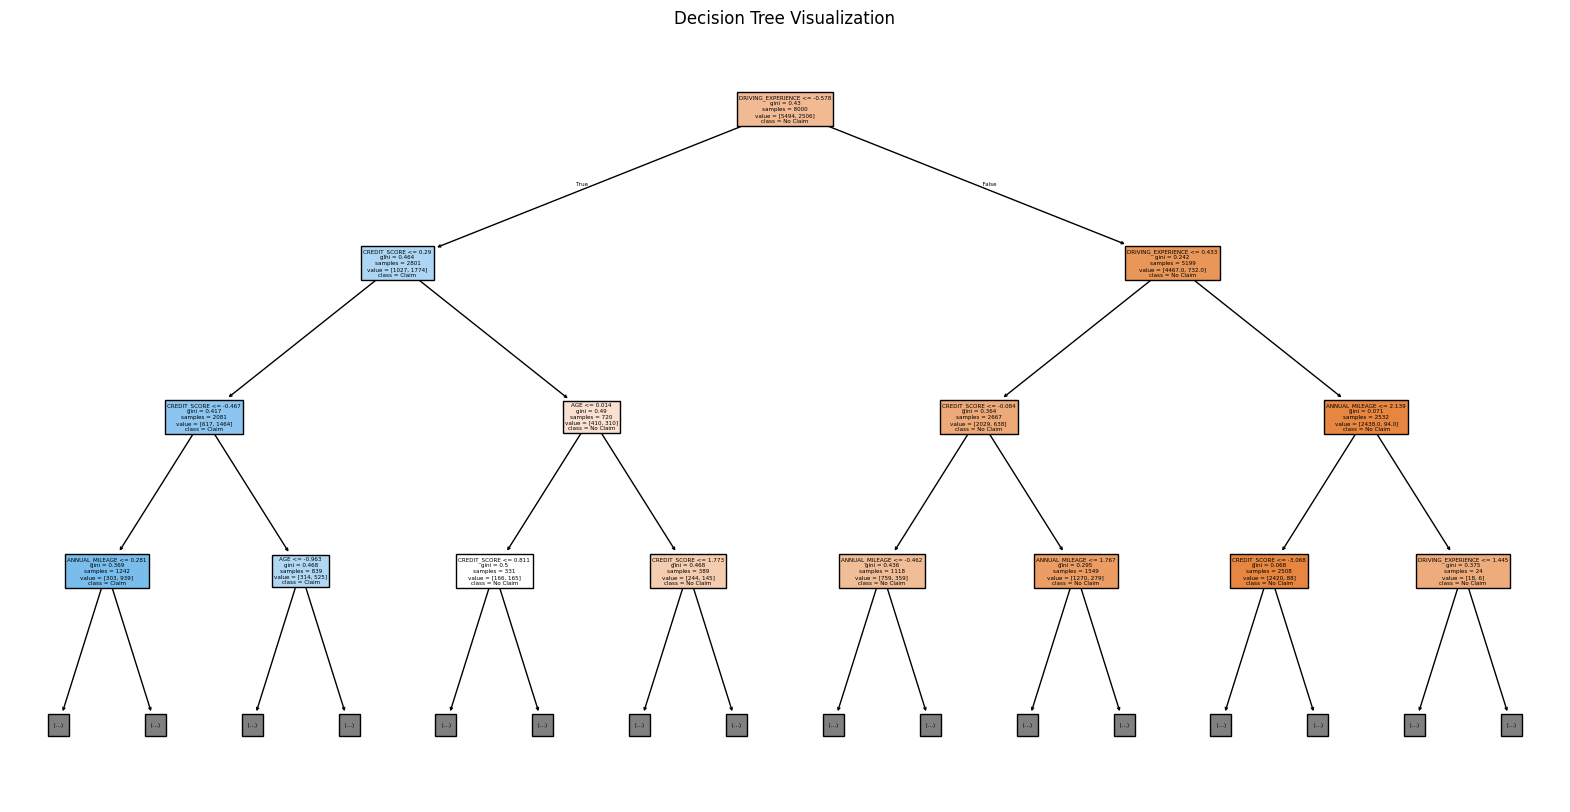

In [43]:
dt = DecisionTreeClassifier(random_state=42, max_depth=5)
dt.fit(X_train, y_train)
y_pred_dt = dt.predict(X_test)
from sklearn.tree import plot_tree
plt.figure(figsize=(20,10))
plot_tree(dt,feature_names=X.columns,class_names=['No Claim', 'Claim'],filled=True,max_depth=3)
plt.title("Decision Tree Visualization")
plt.show()

In [44]:
def evaluate_model(y_true, y_pred, model_name):
    print(f"\n{model_name} Results")
    print("Accuracy:", accuracy_score(y_true, y_pred))
    print(classification_report(y_true, y_pred))

    cm = confusion_matrix(y_true, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm)
    disp.plot()
    plt.title(model_name)
    plt.show()


Logistic Regression Results
Accuracy: 0.7735
              precision    recall  f1-score   support

         0.0       0.82      0.86      0.84      1373
         1.0       0.65      0.59      0.62       627

    accuracy                           0.77      2000
   macro avg       0.74      0.72      0.73      2000
weighted avg       0.77      0.77      0.77      2000



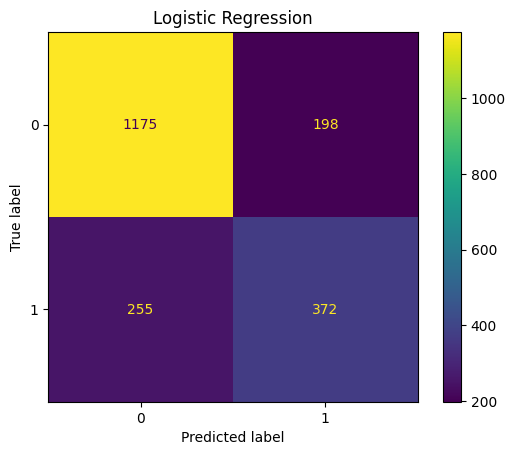


Random Forest Classifier Results
Accuracy: 0.728
              precision    recall  f1-score   support

         0.0       0.79      0.82      0.81      1373
         1.0       0.57      0.52      0.54       627

    accuracy                           0.73      2000
   macro avg       0.68      0.67      0.67      2000
weighted avg       0.72      0.73      0.72      2000



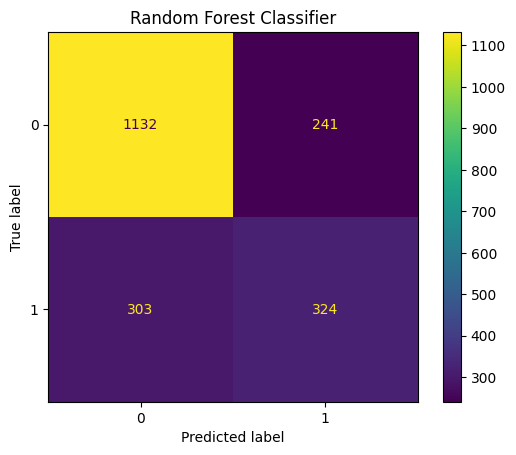


Decision Tree Classifier Results
Accuracy: 0.7745
              precision    recall  f1-score   support

         0.0       0.82      0.86      0.84      1373
         1.0       0.66      0.59      0.62       627

    accuracy                           0.77      2000
   macro avg       0.74      0.72      0.73      2000
weighted avg       0.77      0.77      0.77      2000



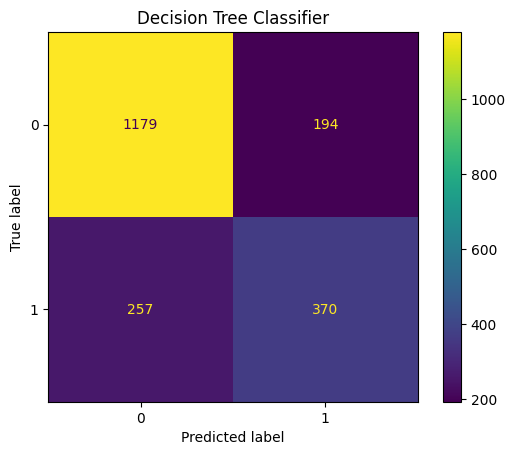

In [45]:
evaluate_model(y_test, y_pred_lr, "Logistic Regression")
evaluate_model(y_test, y_pred_rf, "Random Forest Classifier")
evaluate_model(y_test, y_pred_dt, "Decision Tree Classifier")

              Feature  Importance
2        CREDIT_SCORE    0.553424
4  DRIVING_EXPERIENCE    0.180433
0                 AGE    0.107908
1      ANNUAL_MILEAGE    0.100914
3      PAST_ACCIDENTS    0.057320


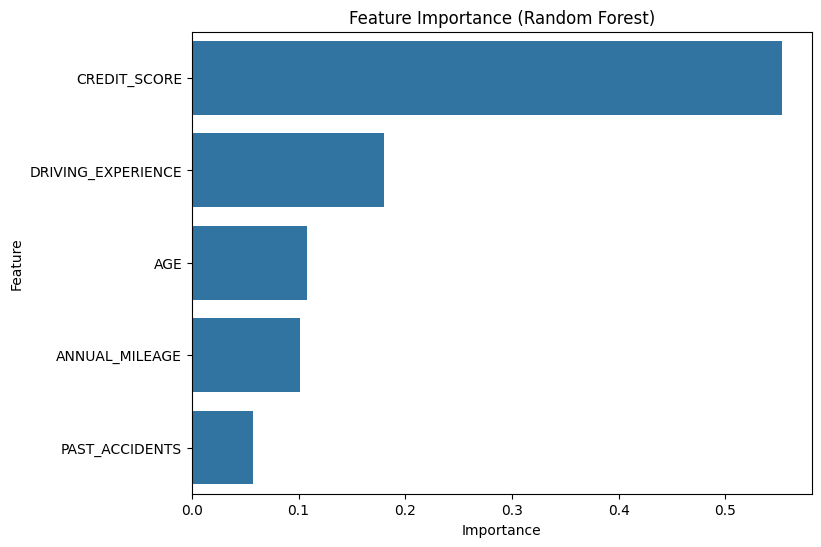

In [46]:
importance_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': rf.feature_importances_
}).sort_values(by='Importance', ascending=False)
print(importance_df)
plt.figure(figsize=(8,6))
sns.barplot(x='Importance', y='Feature', data=importance_df)
plt.title("Feature Importance (Random Forest)")
plt.show()